In [ ]:
! wget https://raw.githubusercontent.com/gevabriel/dataset/main/indo_spam_5.csv

--2023-10-25 13:08:34--  https://raw.githubusercontent.com/gevabriel/dataset/main/indo_spam_5.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3931062 (3.7M) [text/plain]
Saving to: ‘indo_spam_5.csv’

indo_spam_5.csv     100%[===================>]   3.75M  --.-KB/s    in 0.01s   

2023-10-25 13:08:35 (255 MB/s) - ‘indo_spam_5.csv’ saved [3931062/3931062]



In [ ]:
! pip install -U accelerate
! pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 103.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.9 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.18.0
    Uninstalling huggingface-hub-0.18.0:
      Successfully uninstalled huggingface-hub-0.18.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as pl
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.5 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from transformers import AutoModelForSequenceClassification
from transformers import Trainer
from datasets import load_metric

In [ ]:
# load data
df = pd.read_csv('indo_spam_5.csv')
df.head()

,Kategori,Pesan
0,spam,Secara alami tak tertahankan identitas perusah...
1,spam,Fanny Gunslinger Perdagangan Saham adalah Merr...
2,spam,Rumah -rumah baru yang luar biasa menjadi muda...
3,spam,4 Permintaan Khusus Pencetakan Warna Informasi...
4,spam,"Jangan punya uang, dapatkan CD perangkat lunak..."


In [ ]:
# Contoh untuk mengambil 30 kata pertama
df["Pesan"] = df["Pesan"].apply(lambda x: " ".join(x.split()[:256]))

In [ ]:
df['label'] = df['Kategori'].apply(lambda x:0 if x=="ham" else 1)

In [ ]:
df = df.drop(columns=['Kategori'])
df.rename(columns={"Pesan": "Teks"}, inplace=True)
df

,Teks,label
0,Secara alami tak tertahankan identitas perusah...,1
1,Fanny Gunslinger Perdagangan Saham adalah Merr...,1
2,Rumah -rumah baru yang luar biasa menjadi muda...,1
3,4 Permintaan Khusus Pencetakan Warna Informasi...,1
4,"Jangan punya uang, dapatkan CD perangkat lunak...",1
...,...,...
2631,Pengingat halo semuanya: Vince telah meminta s...,0
2632,Re: Argentina Power & Gas Market Modeling Oke ...,0
2633,"Re: Program Enron / Stanford Stinson, hebat! S...",0
2634,"Persetujuan untuk peninjau Roberts JR, Michael...",0


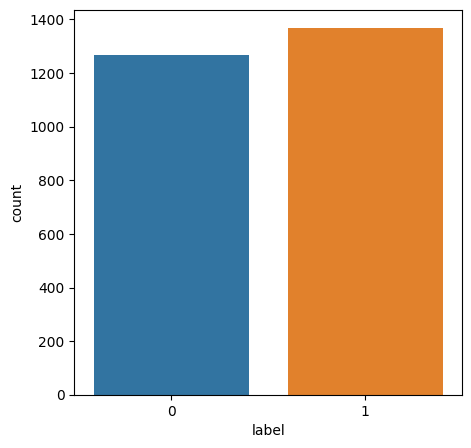

In [ ]:
# check count and unique and top values and their frequency
plt.figure(figsize=(5, 5))
sns.countplot(x=df['label'])
plt.show()

In [ ]:
df['label'].value_counts()

1    1368
0    1268
Name: label, dtype: int64

In [ ]:
df.sample(10)

,Teks,label
1951,Perubahan organisasi mengingat evolusi sejumla...,0
2004,PDO lebih banyak di media tentang osilasi Paci...,0
1736,"Presentasi Simulasi WTI - John terbaru, ini ad...",0
1603,"Informasi Latar Belakang Tom, Bisakah Anda men...",0
751,Tambahkan logo dan nada ke ponsel Anda 1575332...,1
1064,"lebih dari 100, 000 u. S . Pekerjaan Tersedia ...",1
1662,Risiko Artikel FYI. - - - - - - - - - - - - - ...,0
2431,NEW Nilai Lab FYI. . . . . AJO - - - - - - - -...,0
935,Great Medz Cara Menghemat medlcations Anda leb...,1
1470,"Re: Minta Vince, saya senang Anda menyukainya....",0


Cleaning

In [ ]:
df['Teks']=df['Teks'].str.lower()
df

,Teks,label
0,secara alami tak tertahankan identitas perusah...,1
1,fanny gunslinger perdagangan saham adalah merr...,1
2,rumah -rumah baru yang luar biasa menjadi muda...,1
3,4 permintaan khusus pencetakan warna informasi...,1
4,"jangan punya uang, dapatkan cd perangkat lunak...",1
...,...,...
2631,pengingat halo semuanya: vince telah meminta s...,0
2632,re: argentina power & gas market modeling oke ...,0
2633,"re: program enron / stanford stinson, hebat! s...",0
2634,"persetujuan untuk peninjau roberts jr, michael...",0


In [ ]:
import re

In [ ]:
def clean_text(words):
    """The function to clean text"""
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()
    return " ".join(text)

In [ ]:
df['Teks']=df['Teks'].apply(clean_text)
df

,Teks,label
0,secara alami tak tertahankan identitas perusah...,1
1,fanny gunslinger perdagangan saham adalah merr...,1
2,rumah rumah baru yang luar biasa menjadi mudah...,1
3,permintaan khusus pencetakan warna informasi t...,1
4,jangan punya uang dapatkan cd perangkat lunak ...,1
...,...,...
2631,pengingat halo semuanya vince telah meminta sa...,0
2632,re argentina power gas market modeling oke jul...,0
2633,re program enron stanford stinson hebat saya m...,0
2634,persetujuan untuk peninjau roberts jr michael ...,0


In [ ]:
def cleaning_text(text):
  return text.translate(str.maketrans("","",string.punctuation))
  return text.strip()
  return re.sub('\s+',' ',text)
  return re.sub(r"\b[a-zA-Z]\b", "", text)

In [ ]:
df['Teks']=df['Teks'].apply(clean_text)
df

,Teks,label
0,secara alami tak tertahankan identitas perusah...,1
1,fanny gunslinger perdagangan saham adalah merr...,1
2,rumah rumah baru yang luar biasa menjadi mudah...,1
3,permintaan khusus pencetakan warna informasi t...,1
4,jangan punya uang dapatkan cd perangkat lunak ...,1
...,...,...
2631,pengingat halo semuanya vince telah meminta sa...,0
2632,re argentina power gas market modeling oke jul...,0
2633,re program enron stanford stinson hebat saya m...,0
2634,persetujuan untuk peninjau roberts jr michael ...,0


In [ ]:
def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

In [ ]:
df['Teks']=df['Teks'].apply(remove_tweet_special)
df

,Teks,label
0,secara alami tak tertahankan identitas perusah...,1
1,fanny gunslinger perdagangan saham adalah merr...,1
2,rumah rumah baru yang luar biasa menjadi mudah...,1
3,permintaan khusus pencetakan warna informasi t...,1
4,jangan punya uang dapatkan cd perangkat lunak ...,1
...,...,...
2631,pengingat halo semuanya vince telah meminta sa...,0
2632,re argentina power gas market modeling oke jul...,0
2633,re program enron stanford stinson hebat saya m...,0
2634,persetujuan untuk peninjau roberts jr michael ...,0


In [ ]:
RANDOM_SEED = 42

df_train, df_test = train_test_split(
    df,
    test_size=0.2,
    random_state=RANDOM_SEED,
)

df_val, df_test = train_test_split(
    df_test,
    test_size=0.4,
    random_state=RANDOM_SEED,
)

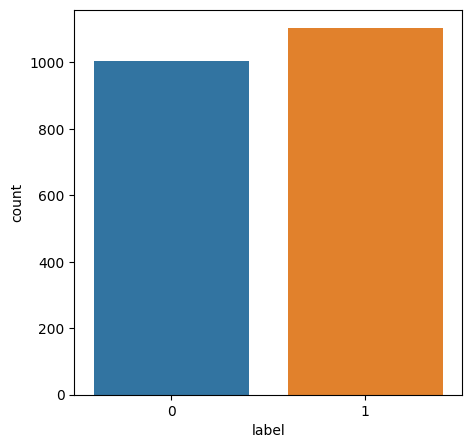

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df_train['label'])
plt.show()

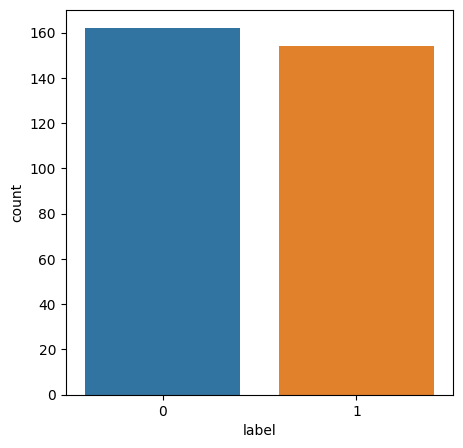

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df_val['label'])
plt.show()

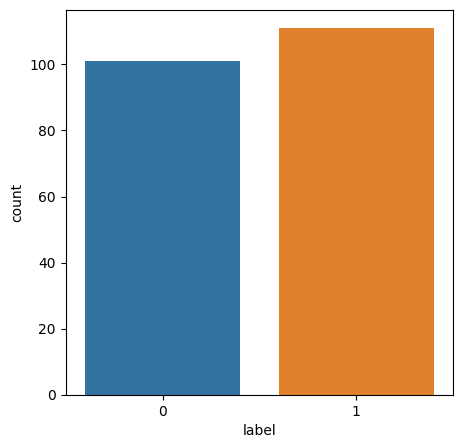

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df_test['label'])
plt.show()

In [ ]:
print(f'Total Train: {len(df_train)}')
print(f'Total Val  : {len(df_val)}')
print(f'Total Test : {len(df_test)}')

Total Train: 2108
Total Val  : 316
Total Test : 212


In [ ]:
df_train.to_csv("train.csv", index=False)
df_val.to_csv("eval.csv", index=False)
df_test.to_csv("test.csv", index=False)

In [ ]:
from datasets import load_dataset

files = {
    "train": "train.csv",
    "eval": "eval.csv",
    "test": "test.csv",
}

dataset = load_dataset('csv', data_files=files)

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating eval split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")

In [ ]:
def tokenize_function(text):
    return tokenizer(text["Teks"], padding='max_length', max_length=512)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/2108 [00:00<?, ? examples/s]

Map:   0%|          | 0/316 [00:00<?, ? examples/s]

Map:   0%|          | 0/212 [00:00<?, ? examples/s]

In [ ]:
train_dataset = tokenized_datasets["train"]
eval_dataset = tokenized_datasets["eval"]

In [ ]:
import torch
torch.cuda.empty_cache()

device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments
from torch import clamp

training_args = TrainingArguments(
    "test_trainer",
    per_device_train_batch_size=4,
)

In [ ]:
metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    return metric.compute(predictions=predictions, references=labels)

torch.cuda.empty_cache()

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

training_history = trainer.train()

<ipython-input-34-fd3739473b36>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


Step,Training Loss
500,0.683500
1000,0.696600
1500,0.451600


In [ ]:
evaluation_history = trainer.evaluate()
evaluation_history

{'eval_loss': 0.17249435186386108,
 'eval_accuracy': 0.9335443037974683,
 'eval_runtime': 9.8558,
 'eval_samples_per_second': 32.062,
 'eval_steps_per_second': 4.059,
 'epoch': 3.0}

In [ ]:
test_dataset = tokenized_datasets["test"]

prediction = trainer.predict(test_dataset)
prediction = prediction.predictions.argmax(1)

In [ ]:
actual_label = df_test['label']

In [ ]:
print(classification_report(prediction, actual_label, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        94
           1       0.98      0.92      0.95       118

    accuracy                           0.95       212
   macro avg       0.95      0.95      0.95       212
weighted avg       0.95      0.95      0.95       212



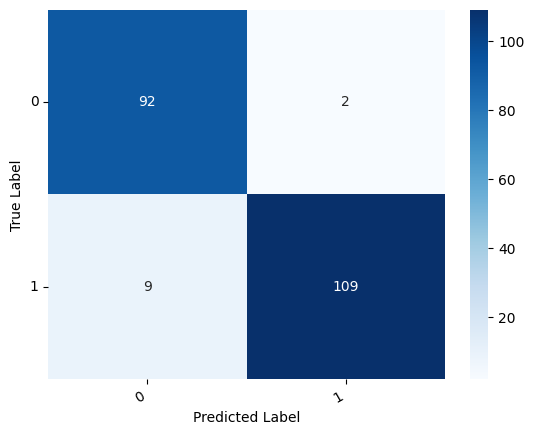

In [ ]:
def show_confusion_matrix(confusion_matrix):
        hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
        hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
        hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')

        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')

cm = confusion_matrix(prediction, actual_label)
show_confusion_matrix(cm)

In [ ]:
model.save_pretrained("model")

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("model")

In [ ]:
trainer = Trainer(model=model)

In [ ]:
def predict(text):
    tokenized = tokenizer(text, padding='max_length', max_length=256)
    label = trainer.predict([tokenized]).predictions.argmax(1)[0]
    if label == 0:
        print(f'Predicted: Ham [{label}]')
    else:
        print(f'Predicted: Spam [{label}]')

In [ ]:
predict("""
    Selamat!! anda Mendpt hadiah Rp. 75 juta. Dari TELKOMSEL point "Edisi september" Hub kntr pusat
""")

Predicted: Spam [1]


In [ ]:
predict("""
    Assalamualaikum Pak. Ini dg nama1 ilkom 2012. Maaf Pak td saya ninggalin proposal di meja Bapak di atas printer. Terima kasih Pak.
""")

Predicted: Ham [0]
